In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Prob-1

In [4]:
train_x_path = r"E:\Coding\AIME\data\train_data\phase-2\prob-1\train_x.parquet"
train_y_path = r"E:\Coding\AIME\data\train_data\phase-2\prob-1\train_y.parquet"

train_x = pd.read_parquet(train_x_path)
train_y = pd.read_parquet(train_y_path)

test_x_path = r"E:\Coding\AIME\data\train_data\phase-2\prob-1\test_x.parquet"
test_y_path = r"E:\Coding\AIME\data\train_data\phase-2\prob-1\test_y.parquet"

test_x = pd.read_parquet(test_x_path)
test_y = pd.read_parquet(test_y_path)

In [5]:
train_x

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41
0,0.000010,119,0,4,2.0,0.0,200.0,0.0,254.0,0.0,...,6.0,4.0,4.0,13.0,0.0,0.0,0.0,6.0,9.0,0.0
1,0.000006,118,2,4,2.0,0.0,114.0,0.0,254.0,0.0,...,14.0,14.0,14.0,29.0,0.0,0.0,0.0,14.0,29.0,0.0
2,1.005710,112,0,3,10.0,8.0,564.0,354.0,254.0,252.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0
3,0.000001,118,2,4,2.0,0.0,114.0,0.0,254.0,0.0,...,17.0,17.0,17.0,25.0,0.0,0.0,0.0,17.0,25.0,0.0
4,0.000007,118,2,4,2.0,0.0,114.0,0.0,254.0,0.0,...,13.0,13.0,13.0,29.0,0.0,0.0,0.0,15.0,29.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49467,0.000004,119,0,4,2.0,0.0,200.0,0.0,254.0,0.0,...,5.0,4.0,4.0,10.0,0.0,0.0,0.0,5.0,7.0,0.0
49468,0.000003,118,0,4,2.0,0.0,168.0,0.0,254.0,0.0,...,8.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
49469,0.244025,112,0,3,62.0,62.0,3702.0,48710.0,31.0,29.0,...,2.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0,4.0,0.0
49470,0.715396,112,0,1,6.0,2.0,978.0,86.0,62.0,252.0,...,2.0,2.0,1.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0


0 %  36.16
1 %     63.84


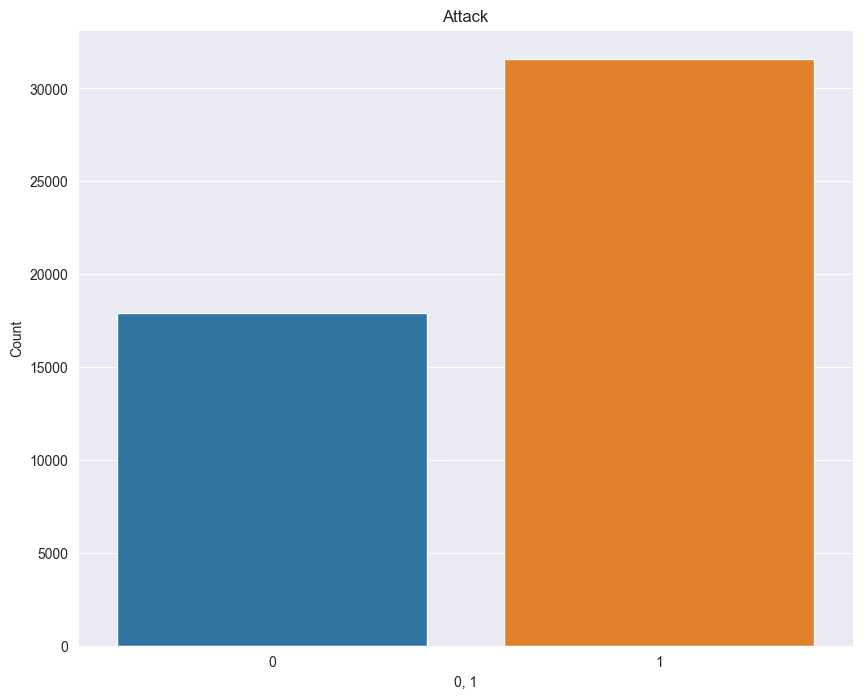

In [7]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.barplot(x=train_y.label.value_counts().index,y=train_y.label.value_counts())
plt.title('Attack')
plt.ylabel('Count')
plt.xlabel('0, 1')
print ('0 % ',round(train_y.label.value_counts()[0]/len(train_y.label)*100,2))
print ('1 %    ',round(train_y.label.value_counts()[1]/len(train_y.label)*100,2))

In [8]:
train_x = train_x.to_numpy()
train_y = train_y.to_numpy()


test_x  = test_x .to_numpy()
test_y  = test_y.to_numpy()

In [9]:
# train model
if len(np.unique(train_y)) == 2:
    objective = "binary:logistic"
else:
    objective = "multi:softprob"
model_params = {"random_state": 42}
model = xgb.XGBClassifier(objective=objective, **model_params)
model.fit(train_x, train_y)

# evaluate
predictions = model.predict(test_x)
auc_score = roc_auc_score(test_y, predictions)
metrics = {"test_auc": auc_score}
metrics

{'test_auc': 0.9361794882118687}

# Prob-2

In [89]:
train_x_path = r"E:\Coding\AIME\data\train_data\phase-2\prob-2\train_x.parquet"
train_y_path = r"E:\Coding\AIME\data\train_data\phase-2\prob-2\train_y.parquet"

train_x = pd.read_parquet(train_x_path)
train_y = pd.read_parquet(train_y_path)

test_x_path = r"E:\Coding\AIME\data\train_data\phase-2\prob-2\test_x.parquet"
test_y_path = r"E:\Coding\AIME\data\train_data\phase-2\prob-2\test_y.parquet"

test_x = pd.read_parquet(test_x_path)
test_y = pd.read_parquet(test_y_path)

In [90]:
train_x = train_x.to_numpy()
train_y = train_y.to_numpy()


test_x  = test_x .to_numpy()
test_y  = test_y.to_numpy()

In [91]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(train_y)
train_y = label_binarizer.transform(train_y)
test_y = label_binarizer.transform(test_y)

In [92]:
# train model
if len(np.unique(train_y)) == 2:
    objective = "binary:logistic"
else:
    objective = "multi:softprob"
model_params = {"random_state": 42}
model = xgb.XGBClassifier(objective=objective, **model_params)
model.fit(train_x, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [93]:
# evaluate
predictions = model.predict_proba(test_x)
# auc_score = roc_auc_score(test_y, predictions, multi_class='ovr')
# metrics = {"test_auc": auc_score}
# metrics

In [94]:
label_binarizer.inverse_transform(predictions)

array(['Malware', 'Denial of Service', 'Normal', ..., 'Exploits',
       'Denial of Service', 'Denial of Service'], dtype='<U21')

In [96]:
from pickle import dump
# save the scaler
dump(label_binarizer, open(r'E:\Coding\AIME\data\train_data\phase-2\prob-2/label_binarizer.pkl', 'wb'))


In [99]:
# load the scaler
from pickle import load
label_binarizer_test = load(open(r'E:\Coding\AIME\data\train_data\phase-2\prob-2/label_binarizer.pkl', 'rb'))
label_binarizer_test.inverse_transform(predictions)

array(['Malware', 'Denial of Service', 'Normal', ..., 'Exploits',
       'Denial of Service', 'Denial of Service'], dtype='<U21')

In [97]:
auc_score = roc_auc_score(test_y, predictions, multi_class='ovr')
# metrics = {"test_auc": auc_score}
# metrics